In [1]:
%run 'shared_functions.ipynb'

# 3.1
A Chebyshev filter must pass frequencies above 1 kHz (not rad/s) with max. 0.5 dB attenuation and must attenuate frequencies below 100 Hz with at least 60 dB

- Pass frequencies above 1 kHz with max 0.5 dB
- Attenuate frequencies below 100 Hz with at least 60 dB

## a. Make a rough sketch of the filter requirements

Use the one from the solutions, so I do not have to.

![sketch](figs/mm3.1.a.png)

## b. Find the necessary filter order, n, using the HP<->LP frequency mapping, and the "n = " equation from the slides from lecture2 

From MM3.S13, we get

$$
H_{HP}(j\Omega) = H_{LPP} \left( j\frac{-\Omega_0}{\Omega} \right)
$$

Which gives us

$$
\left| H_{HP}(j\Omega) \right| = \left| H_{LPP} \left( \frac{1000}{100} \right) \right| = 10
$$

Then we can use the formula from MM2.S17, to solve it (shared_functions).

In [2]:
chebyshevFilterOrder(10, 60, 0.5)

2.8907615183727207

## c. Find (analytically) the actual attenuation at 100 Hz
From MM2.S15 we can see the three formulas we need, keep in mind MM2.S10 regarding $C_n(\omega)$

First find our $\epsilon$, then our $C_n(\omega)$, followed by $H(j\omega)_{dB}$.

$$
\begin{align}
\epsilon &= \sqrt{10^{\text{Ripple}_{dB}/10}-1} \\
C_n(\omega) &= \cosh{(n \cdot \cosh^{-1}(\omega))} \\
H(j\omega)_{dB} &= -10log_{10}(1 + \epsilon^2C_N^2(\omega))
\end{align}
$$

In [3]:
import math
ripple_dB = 0.5
n = 3
omega = 10

ep = math.sqrt(10**(ripple_dB/10)-1)
C_3 = math.cosh(n * math.acosh(omega))
H_dB = -10 * math.log10(1+ep**2*C_3**2)
ep, C_3, H_dB

(0.34931140018894796, 3969.9999999999986, -62.840067585158636)

Which gives us a result of -62.8 dB , but a attenuation of 62.8 dB.

## d. Check the result in c. by making a plot in Matlab
This does not work for some reason

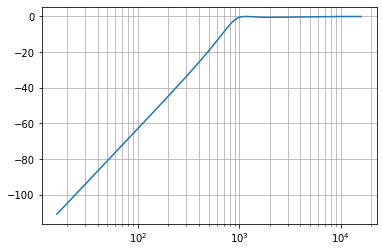

In [23]:
import matplotlib.pyplot as plt
from scipy import signal
import math

# variables
n = 3
ripple_dB = 0.5
stopband = 2*math.pi*10**3

numPoly, demPoly = signal.cheby1(n, ripple_dB, stopband, 'high', 's')
sys = signal.TransferFunction(numPoly, demPoly)
# can be used instead
w_range = np.logspace(2,5,20000)
w, mag, phase = signal.bode(sys, w_range)
# convert to Hz instead of rad/s
w = (w/(2*math.pi))

fig, ax = plt.subplots()
ax.grid(b=True, which="both")
ax.semilogx(w, mag)
#ax.semilogx(w, phase)

## e. A normalized 3rd order Chebyshev LP-filter with 0.5 dB ripple can be made using the circuit shown with:

- $L_1 = 1.3465$ H
- $C_2 = 1.3001$ F
- $L_3 = 0.7981$ H

Find the component values in a 1 kHz HP-filter.

![circuit](figs/mm3.1.e.png)

From MM3.S25, we can see how to calculate LP to HP, also remember to make the new circuit, just to show that you can.

In [10]:
import math

L_1 = 1.3465
C_2 = 1.3001
L_3 = 0.7981

omega_0 = 2*math.pi*10**3
L_HP1 = 1/(omega_0*L_1)
C_HP2 = 1/(omega_0*C_2)
L_HP3 = 1/(omega_0*L_3)

L_HP1/(10**(-6)), C_HP2/(10**(-6)), L_HP3/(10**(-6))

(118.19899227025277, 122.41746257356769, 199.41729494035252)

All the above values are in micro ($\mu$), which is defined as $10^{-6}$.

# 3.2
A BP-filter made from a 4th order LP-prototype has:
- Butterworth characteristic
- Lower passband edge (-3 dB) = 10 kHz
- Upper passband edge (-3 dB) = 15 kHz



## a. Find (analytically) the attenuation at 1 kHz and 20 kHz using the frequency transformation and $|H(j\omega)|^2$ for the low-pass prototype.

We need to use the formula from MM3.S20, to find the attenuation

$$
H_{BP}(j\Omega) = H_{LPP} \left( j\frac{\Omega^2-\Omega_0^2}{\Omega \cdot B} \right)
$$

For this we need $\Omega_0$, as well as $B$.

This is done using the same formulas found on the slide after

$$
\begin{align}
B = \Omega_2-\Omega_1 \\
\Omega_0 = \sqrt{\Omega_1\Omega_2} \\
\end{align}
$$

And lastly we need the function NOT IN THE SLIDES, to calculate the dB from Ming.

```
10log(abs(H(jw))^2), and since abs(H(jw))^2=1/(1+w^(2n)) 
10log(abs(H(jw))^2)= 10log(1/(1+w^(2n)))=10log(/(1+w^(2n))^-1)=-10log(/(1+w^(2n)))
```

Written as $-10log_{10}(1+\omega^{2n})$

Where:

- $\Omega_1 = 2\pi 10 \cdot 10^3$ rad/s
- $\Omega_2 = 2\pi 15 \cdot 10^3$ rad/s

In [1]:
import math

n = 4
omega_1 = 2*math.pi*10**4
omega_2 = 2*math.pi*15*10**3
omega_0 = math.sqrt(omega_1*omega_2)
B = omega_2-omega_1

H_BP = lambda omega, omega_0, B: 1j * ((omega**2-omega_0**2)/(omega*B))
to_dB = lambda omega, n: -10*math.log10(1+omega**(2*n))

H1 = H_BP(2*math.pi*10**3, omega_0, B)
H1F = to_dB(abs(H1), n) # take the abs value, as we do not want imaginary part in equation
H2 = H_BP(2*math.pi*20*10**3, omega_0, B)
H2F = to_dB(abs(H2), n)

H1, H1F, H2, H2F

((-0-29.800000000000015j),
 -117.93730112610743,
 2.5000000000000013j,
 -31.838045953846606)

We then get -118 dB and 31.8 dB

## b. Check the result in a. by making a plot in Matlab.

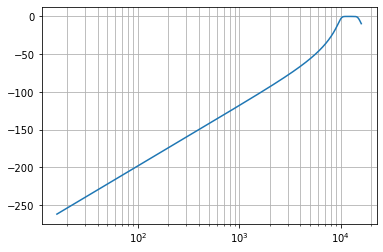

In [25]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import math

# variables
n = 4
wn = 2*math.pi*np.array([10, 15])*10**3

numPoly, demPoly = signal.butter(n, wn, 'bandpass', 's')
sys = signal.TransferFunction(numPoly, demPoly)
# can be used instead
w_range = np.logspace(2,5,20000)
w, mag, phase = signal.bode(sys, w_range)
#w, mag, phase = signal.bode(sys)
# convert to Hz instead of rad/s
w = (w/(2*math.pi))

fig, ax = plt.subplots()
ax.grid(b=True, which="both")
ax.semilogx(w, mag)

# 3.3
Matlab stuff, does not seem that useful

# 3.4
A high-pass filter section has the transfer function:

$$
H(s) = -
\frac{
\frac{C_1}{C_2}s^2
}{
s^2 + \frac{C_1+C_2+C_3}{R_2C_2C_3}s + \frac{1}{R_1R_2C_2C_3}
}
$$

The capacitor values are:

- $C_1 = 10 nF$
- $C_2 = C_3 = 15 nF$

The standard form for a second order function, is given is MM3.S40, not 100% correct but matches enough.

$$
H(s) = 
\frac{
s \frac{\omega_s}{Q}
}{
s^2+s\frac{\omega_0}{Q}+\omega_0^2
}
$$

## a. Find an expression for Q as a function of the component values
We can use the standard form, to get the value of Q, as we know $\omega_0^2$ and can therefore express $Q$ using that.

$$
\begin{align}
\omega_0^2 &=  \frac{1}{R_1R_2C_2C_3} \\
\omega_0 &=  \sqrt{\frac{1}{R_1R_2C_2C_3}} \\
\end{align}
$$

$$
\begin{align}
\frac{\omega_0}{Q} &= \frac{C_1+C_2+C_3}{R_2C_2C_3} \\
Q &= \frac{\omega_0}{\frac{C_1+C_2+C_3}{R_2C_2C_3}} \\
&= \frac{\sqrt{\frac{1}{R_1R_2C_2C_3}}}{\frac{C_1+C_2+C_3}{R_2C_2C_3}} \\
&= \frac{\frac{1}{\sqrt{R_1R_2C_2C_3}}}{\frac{C_1+C_2+C_3}{R_2C_2C_3}} \\
&= \frac{
R_2C_2C_3
}{
\sqrt{R_1R_2C_2C_3} C_1+C_2+C_3
} \\
&= \frac{
\sqrt{R_2^2C_2^2C_3^2}
}{
\sqrt{R_2C_2C_3}
}
\frac{1}{\sqrt{R_1}C_1+C_2+C_3}
\\
&= \frac{
\sqrt{R_2C_2C_3}
}{
1
}
\frac{1}{\sqrt{R_1}C_1+C_2+C_3}
\\
Q &= 
\frac{\sqrt{R_2C_2C_3}}{\sqrt{R_1}C_1+C_2+C_3}
\\
\end{align}
$$

## b. Find the sensitivity of Q with respect to $C_1$ , $S_{C_1}^Q$.
- Find the sensitivity of Q with respect to $C_1$ , $S_{C_1}^Q$.

From MM3.S37+S38, we get the following.

$$
\begin{align}
S^{ky}_x &= S^y_x \\
S^{y^n}_x &= n \cdot S^{y}_x \\
S^{y_1y_2}_x &= S^{y_1}_x + S^{y_2}_x \\
S_{x_i}^y &= \frac{x_1}{y} \cdot \frac{\partial y}{\partial x_i}
\end{align}
$$

We can use that to rewrite our expression for $Q$, as firstly we will move all the constants out.

$$
\begin{align}
Q &= \frac{\sqrt{R_2C_2C_3}}{\sqrt{R_1}C_1+C_2+C_3} \\
Q &= \frac{\sqrt{R_2C_2C_3}}{\sqrt{R_1}} \frac{1}{C_1+C_2+C_3} \\
Q &= \frac{\sqrt{R_2C_2C_3}}{\sqrt{R_1}} (C_1+C_2+C_3)^{-1} \\
\end{align}
$$

This we can the use in our expression, for finding the sensitivity.

$$
\begin{align}
S^Q_{C_1} &= S_{C_1}^{(C_1+C_2+C_3)^-1} = -1 \cdot S_{C_1}^{C_1+C_2+C_3} = - \frac{C_1}{C_1+C_2+C_3} \cdot \frac{\partial(C_1+C_2+C_3)}{\partial(C_1)} \\
&= - \frac{C_1}{C_1+C_2+C_3} \cdot \frac{\partial(C_1+C_2+C_3)}{\partial(C_1)} \\
&= - \frac{C_1}{C_1+C_2+C_3} \cdot 1 \\
&= - \frac{10}{10+15+15} = -\frac{10}{40} = - 0.25 \\
\end{align}
$$